In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-7byv6irb because the default path (/home/jupyter/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [37]:
results_data = pd.read_csv("test_data_ALL.csv")
results_data['Prob_distances'] = abs(results_data['Prob_real(0)'] - results_data['Prob_real(1)'])

In [33]:
#Politifact error subset
pf_incorrect_predictions = results_data[(results_data['Predictions'] != results_data['Labels']) 
             & (results_data['Source'] == "politifact")] 

pf_incorrect_predictions

,Unnamed: 0,Unnamed: 0.1,Article,Source,Token_Length,Predictions,Labels,Logit_real(0),Logit_fake(1),Prob_real(0),Prob_real(1),File_Name,Sort_Result
24,24,24,24,politifact,1244,1,0,-3.508490,3.389153,0.001009,0.998991,politifact9802,political
52,52,52,52,politifact,1442,1,0,-3.737876,3.626107,0.000633,0.999367,politifact4028,political
87,87,87,87,politifact,256,1,0,-3.367941,2.963150,0.001777,0.998223,politifact1014,political
92,92,92,92,politifact,868,1,0,-1.727226,1.517483,0.037517,0.962483,politifact9576,political
93,93,93,93,politifact,534,1,0,-4.154518,4.052439,0.000273,0.999727,politifact1500,political
115,115,115,115,politifact,308,1,0,-0.804108,0.245983,0.259208,0.740792,politifact1118,political
1068,932,932,932,politifact,539,0,1,2.432113,-2.558442,0.993244,0.006756,politifact14327,gossip
1380,1244,1244,1244,politifact,435,0,1,2.425135,-2.505094,0.992827,0.007173,politifact13467,gossip
1550,1414,1414,1414,politifact,145,0,1,2.424810,-2.560727,0.993210,0.006790,politifact13608,gossip
1770,1634,1634,1634,politifact,842,0,1,2.351389,-2.432395,0.991705,0.008295,politifact14213,gossip


In [10]:
#Gossipcop error subset
gc_incorrect_predictions = results_data[(results_data['Predictions'] != results_data['Labels']) 
             & (results_data['Source'] == "gossipcop")] 
gc_incorrect_predictions

,Unnamed: 0,Unnamed: 0.1,Article,Source,Token_Length,Predictions,Labels,Logit_real(0),Logit_fake(1),Prob_real(0),Prob_real(1),File_Name,Sort_Result
2,2,2,2,gossipcop,351,1,0,-1.782905,1.667640,0.030753,0.969247,gossipcop-889110,political
11,11,11,11,gossipcop,532,0,1,0.042995,-0.363749,0.600307,0.399693,gossipcop-7262259263,political
46,46,46,46,gossipcop,220,1,0,-4.624148,4.457840,0.000114,0.999886,gossipcop-882374,political
53,53,53,53,gossipcop,145,1,0,-2.437690,2.106030,0.010522,0.989478,gossipcop-890590,political
64,64,64,64,gossipcop,181,1,0,-3.798351,3.477873,0.000691,0.999309,gossipcop-939340,political
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,3486,3486,3486,gossipcop,493,0,1,0.219666,-0.167476,0.595594,0.404406,gossipcop-480839832,gossip
3623,3487,3487,3487,gossipcop,2475,1,0,-0.921272,1.108136,0.116150,0.883850,gossipcop-869678,gossip
3640,3504,3504,3504,gossipcop,126,0,1,2.449860,-2.592777,0.993585,0.006415,gossipcop-6219083016,gossip
3644,3508,3508,3508,gossipcop,489,1,0,-0.170699,0.273740,0.390684,0.609316,gossipcop-927391,gossip


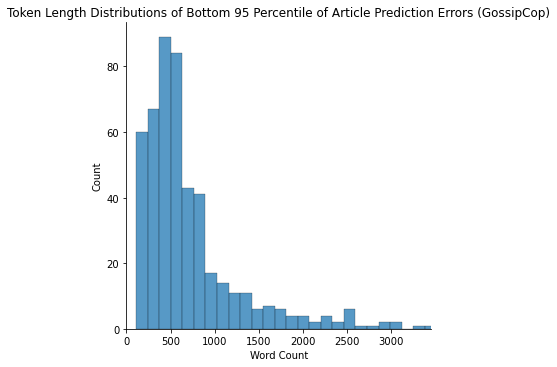

In [21]:
cutoff = gc_incorrect_predictions['Token_Length'].quantile(0.95)

sns.displot(gc_incorrect_predictions, x="Token_Length").set(
    xlim=(0,cutoff), xlabel='Word Count', 
    title="Token Length Distributions of Bottom 95 Percentile of Article Prediction Errors (GossipCop)")

In [8]:
#Gossipcop error subset
results_data[(results_data['Predictions'] != results_data['Labels']) 
             & (results_data['Source'] == "gossipcop")
             & (results_data['Token_Length'] <= 512)] 

,Unnamed: 0,Unnamed: 0.1,Article,Source,Token_Length,Predictions,Labels,Logit_real(0),Logit_fake(1),Prob_real(0),Prob_real(1),File_Name,Sort_Result
2,2,2,2,gossipcop,351,1,0,-1.782905,1.667640,0.030753,0.969247,gossipcop-889110,political
46,46,46,46,gossipcop,220,1,0,-4.624148,4.457840,0.000114,0.999886,gossipcop-882374,political
53,53,53,53,gossipcop,145,1,0,-2.437690,2.106030,0.010522,0.989478,gossipcop-890590,political
64,64,64,64,gossipcop,181,1,0,-3.798351,3.477873,0.000691,0.999309,gossipcop-939340,political
86,86,86,86,gossipcop,112,0,1,3.231746,-3.506815,0.998817,0.001183,gossipcop-3584568934,political
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,3475,3475,3475,gossipcop,448,0,1,1.928181,-1.933056,0.979392,0.020608,gossipcop-8624257636,gossip
3622,3486,3486,3486,gossipcop,493,0,1,0.219666,-0.167476,0.595594,0.404406,gossipcop-480839832,gossip
3640,3504,3504,3504,gossipcop,126,0,1,2.449860,-2.592777,0.993585,0.006415,gossipcop-6219083016,gossip
3644,3508,3508,3508,gossipcop,489,1,0,-0.170699,0.273740,0.390684,0.609316,gossipcop-927391,gossip


In [22]:
#Gossipcop error subset
results_data[(results_data['Predictions'] != results_data['Labels']) 
             & (results_data['Source'] == "gossipcop")
             & (results_data['Token_Length'] > 512)] 

,Unnamed: 0,Unnamed: 0.1,Article,Source,Token_Length,Predictions,Labels,Logit_real(0),Logit_fake(1),Prob_real(0),Prob_real(1),File_Name,Sort_Result
11,11,11,11,gossipcop,532,0,1,0.042995,-0.363749,0.600307,0.399693,gossipcop-7262259263,political
119,119,119,119,gossipcop,3528,0,1,2.213389,-2.736833,0.992968,0.007032,gossipcop-1138523739,political
126,126,126,126,gossipcop,1234,0,1,3.196981,-3.522771,0.998795,0.001205,gossipcop-9948642977,political
142,6,6,6,gossipcop,539,0,1,2.268770,-2.331120,0.990047,0.009953,gossipcop-2389938114,gossip
167,31,31,31,gossipcop,591,0,1,2.403158,-2.526921,0.992826,0.007174,gossipcop-911205800,gossip
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,3432,3432,3432,gossipcop,789,1,0,-0.220641,0.324508,0.366991,0.633009,gossipcop-924826,gossip
3598,3462,3462,3462,gossipcop,1186,0,1,2.437494,-2.580564,0.993426,0.006574,gossipcop-316700565,gossip
3604,3468,3468,3468,gossipcop,582,1,0,-0.603859,0.741487,0.206632,0.793368,gossipcop-873271,gossip
3616,3480,3480,3480,gossipcop,643,0,1,1.919092,-1.920526,0.978951,0.021049,gossipcop-28284230,gossip


In [47]:
close_incorrect_gc_prediction_results = results_data[(results_data['Predictions'] != results_data['Labels']) 
             & (results_data['Source'] == "gossipcop")
             & (results_data['Prob_distances'] <= 0.1)]

close_incorrect_pf_prediction_results = results_data[(results_data['Predictions'] != results_data['Labels']) 
             & (results_data['Source'] == "politifact")
             & (results_data['Prob_distances'] <= 0.1)]

print("total Number of GC incorrect prediction results: ", len(gc_incorrect_predictions))
print("total Number of PF incorrect prediction results: ", len(pf_incorrect_predictions))
print("Number of close GC incorrect prediction results: ", len(close_incorrect_gc_prediction_results))
print("Number of close PF incorrect prediction results: ", len(close_incorrect_pf_prediction_results))                                                    

total Number of GC incorrect prediction results:  512
total Number of PF incorrect prediction results:  14
Number of close GC incorrect prediction results:  39
Number of close PF incorrect prediction results:  0


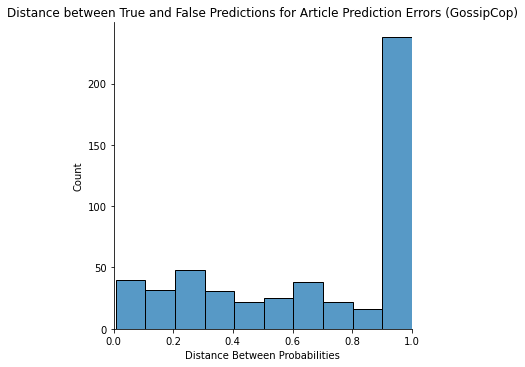

In [40]:
sns.displot(gc_incorrect_predictions, x="Prob_distances").set(
    xlim=(0,1), xlabel='Distance Between Probabilities', 
    title="Distance between True and False Predictions for Article Prediction Errors (GossipCop)")

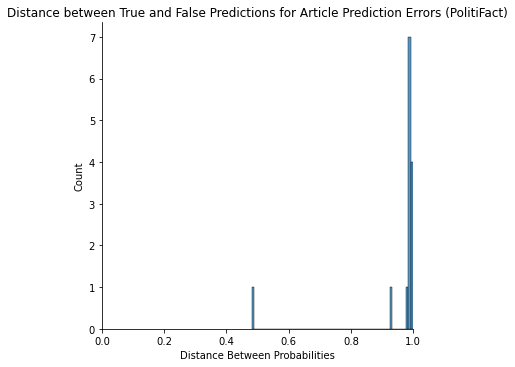

In [41]:
sns.displot(pf_incorrect_predictions, x="Prob_distances").set(
    xlim=(0,1), xlabel='Distance Between Probabilities', 
    title="Distance between True and False Predictions for Article Prediction Errors (PolitiFact)")

In [43]:
gc_incorrect_predictions['Prob_distances'].describe()

count    512.000000
mean       0.669654
std        0.342019
min        0.007538
25%        0.337715
50%        0.786161
75%        0.986040
max        0.999773
Name: Prob_distances, dtype: float64

In [44]:
pf_incorrect_predictions['Prob_distances'].describe()

count    14.000000
mean      0.948893
std       0.135729
min       0.481584
25%       0.984932
50%       0.986454
75%       0.994063
max       0.999455
Name: Prob_distances, dtype: float64